---
# **Python & Plataformas de Trading** 
---
### *Disclaimer:*
Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.<br/>
<br/>


---

## 1. Bibliotecas

In [ ]:
# Instale a biblioteca do Metatrader após ter concluído a configuração junto a sua corretora
!pip install MetaTrader5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Análise e manipulação de dados

import numpy as np
import pandas as pd

In [ ]:
# Análises gráficas

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# Dados séries temporais

from datetime import datetime
import time
import pytz

In [ ]:
# Integração com MetaTrader 5

import MetaTrader5 as mt5

ModuleNotFoundError: ignored

## 2. Estrutura básica do MetaTrader 5 (MT5) usando Python

Apesar de ser construído em outra linguagem (MQL5), o Metatrader desenvolveu um ramo em sua plataforma para abrigar a linguagem Python.<br/>
A linguagem MQL5 (próxima à C++) é muito mais extensa e complexa. A integraçao ao Python tem trazido um número cada vez maior de usuários ao MT5 e facilitado a troca de códigos entre traders

### 2.1. Integração do MT5 ao Python

In [ ]:
# Iniciar o MT5 (se OK aparecerá True)

mt5.initialize()

True

In [ ]:
# Número de símbolos (tickers, ativos) no MT5

mt5.symbols_total()

68213

In [ ]:
# Obter todos os símbolos

symbols=mt5.symbols_get()
print('Total símbolos: ', len(symbols))

Total símbolos:  68213


In [ ]:
# Exibir o total de símbolos que contém "PETR" (para não extrapolar o output)
# Imprimir os 10 primeiros

PETR_symbols=mt5.symbols_get("*PETR*")

print('Total símbolos contendo "PETR": ', len(PETR_symbols))
for i in PETR_symbols[0:10]:
    print(i.name)

Total símbolos contendo "PETR":  4137
PETRA140
PETRA150
PETRA64
PETRB48
PETRB66
PETRC35
PETRC36
PETRA162
PETRA164
PETRA170


### 2.2. Configurar os ativos desejados

In [ ]:
# Incluir o símbolo desejado na janela "Observação do Mercado" (MarketWatch) do MT5
# Note que o ativo aparecerá dentre os demais caso não estivesse antes

ativo = "VALE3"
selected=mt5.symbol_select(ativo,True)
if not selected:
    print(ativo,"não localizado")

In [ ]:
# Testando com um ativo que não existe

ativo_errado = "VALE2"
selected=mt5.symbol_select(ativo_errado,True)
if not selected:
    print(ativo_errado,"não localizado")

VALE2 não localizado


In [ ]:
# Obter as propriedades do ativo desejado em forma de lista

symbol_info=mt5.symbol_info(ativo)

if symbol_info!=None:
    print("Informações gerais de '"+ativo+"':")
    symbol_info_dict = mt5.symbol_info(ativo)._asdict()
    for prop in symbol_info_dict:
        print("  {}={}".format(prop, symbol_info_dict[prop]))

Informações gerais de 'VALE3':
  custom=False
  chart_mode=1
  select=True
  visible=True
  session_deals=53697
  session_buy_orders=0
  session_sell_orders=0
  volume=600
  volumehigh=600000
  volumelow=100
  time=1649347127
  digits=2
  spread=1
  spread_float=True
  ticks_bookdepth=32
  trade_calc_mode=32
  trade_mode=4
  start_time=0
  expiration_time=0
  trade_stops_level=0
  trade_freeze_level=0
  trade_exemode=3
  swap_mode=0
  swap_rollover3days=3
  margin_hedged_use_leg=False
  expiration_mode=2
  filling_mode=3
  order_mode=127
  order_gtc_mode=0
  option_mode=0
  option_right=0
  bid=97.35
  bidhigh=97.37
  bidlow=95.14
  ask=97.36
  askhigh=97.39
  asklow=95.18
  last=97.35
  lasthigh=97.39
  lastlow=95.14
  volume_real=600.0
  volumehigh_real=600000.0
  volumelow_real=100.0
  option_strike=0.0
  point=0.01
  trade_tick_value=0.01
  trade_tick_value_profit=0.01
  trade_tick_value_loss=0.01
  trade_tick_size=0.01
  trade_contract_size=1.0
  trade_accrued_interest=0.0
  trade

Imprimimos o último 'tick' do ativo

In [ ]:
# Informações do último tick do ativo

lasttick=mt5.symbol_info_tick(ativo)
print("Mostrar informações do último tick de '"+ativo+"':")
symbol_info_tick_dict = mt5.symbol_info_tick(ativo)._asdict()
for prop in symbol_info_tick_dict:
    print("  {}={}".format(prop, symbol_info_tick_dict[prop]))

Mostrar informações do último tick de 'VALE3':
  time=1649347140
  bid=97.35
  ask=97.36
  last=97.35
  volume=600
  time_msc=1649347140218
  flags=2
  volume_real=600.0


In [ ]:
# Receber notificações sobre mudanças no book de ofertas (depth of market, DOM) para o símbolo especificado
# DOM muito utilizado em Tape Reading

ativo = 'PETR3'
mt5.market_book_add(ativo)

True

Criar um loop para obtermos 3 vezes os dados do book de ofertas do ativo.<br/>
Configuramos uma pausa de 10 segundos entre cada acesso ao book.<br/>
Por fim, encerramos o acesso ao book daquele ativo

In [ ]:
if mt5.market_book_add(ativo):
  # Obtemos 3 vezes em um loop os dados do livro de ofertas
   for i in range(3):
        # Obtemos o conteúdo do book de ofertas (Depth of Market)
        items = mt5.market_book_get(ativo)
        # Exibimos cada solicitação separadamente para maior clareza
        if items:
            for it in items:
                print(it._asdict())
        # Vamos fazer uma pausa de 10 segundos antes da próxima solicitação de dados do book de ofertas
        # Inserir uma linha para separar cada loop
        print("--------------------")
        time.sleep(10)
  # Cancelamos a subscrição de atualizações no book de ofertas (Depth of Market)
   mt5.market_book_release(ativo)
    
# Caso o ativo não seja encontrado ou ocorra algum outro tipo de erro
else:
    print("Falha ao acessar DOM de ''",ativo,"'', error code =",mt5.last_error())

{'type': 1, 'price': 35.17, 'volume': 3700, 'volume_dbl': 3700.0}
{'type': 1, 'price': 35.16, 'volume': 7600, 'volume_dbl': 7600.0}
{'type': 1, 'price': 35.15, 'volume': 4000, 'volume_dbl': 4000.0}
{'type': 1, 'price': 35.14, 'volume': 7900, 'volume_dbl': 7900.0}
{'type': 1, 'price': 35.13, 'volume': 3700, 'volume_dbl': 3700.0}
{'type': 1, 'price': 35.12, 'volume': 7900, 'volume_dbl': 7900.0}
{'type': 1, 'price': 35.11, 'volume': 10600, 'volume_dbl': 10600.0}
{'type': 1, 'price': 35.1, 'volume': 28400, 'volume_dbl': 28400.0}
{'type': 1, 'price': 35.09, 'volume': 5200, 'volume_dbl': 5200.0}
{'type': 1, 'price': 35.08, 'volume': 7800, 'volume_dbl': 7800.0}
{'type': 1, 'price': 35.07, 'volume': 4200, 'volume_dbl': 4200.0}
{'type': 1, 'price': 35.06, 'volume': 7100, 'volume_dbl': 7100.0}
{'type': 1, 'price': 35.05, 'volume': 4400, 'volume_dbl': 4400.0}
{'type': 1, 'price': 35.04, 'volume': 12500, 'volume_dbl': 12500.0}
{'type': 1, 'price': 35.03, 'volume': 4200, 'volume_dbl': 4200.0}
{'typ

### 2.3. Extrair dados cotações históricas

| Intervalo Tempo |	| Código MT5 |	|   |	| Intervalo Tempo |	| Código MT5 |
|---|	|---|	|---|	|---|	|---|
| 1 minuto|	|TIMEFRAME_M1 |	|   |	| 1 hora|	|TIMEFRAME_H1 |
| 2 minutos|	|TIMEFRAME_M2 |	|   |	| 2 horas|	|TIMEFRAME_H2 |
| 3 minutos|	|TIMEFRAME_M3 |	|   |	| 3 horas|	|TIMEFRAME_H3 |
| 4 minutos|	|TIMEFRAME_M4 |	|   |	| 4 horas|	|TIMEFRAME_H4 |
| 5 minutos|	|TIMEFRAME_M5 |	|   |	| 6 horas|	|TIMEFRAME_H6 |
| 6 minutos|	|TIMEFRAME_M6 |	|   |	| 8 horas|	|TIMEFRAME_H8 |
| 10 minutos|	|TIMEFRAME_M10 |	|   |	| 12 horas|	|TIMEFRAME_H12 |
| 12 minutos|	|TIMEFRAME_M12 |	|   |	| 1 dia|	|TIMEFRAME_D1 |
| 15 minutos|	|TIMEFRAME_M15 |	|   |	| 1 semana|	|TIMEFRAME_W1 |
| 20 minutos|	|TIMEFRAME_M20 |	|   |	| 1 mês |	|TIMEFRAME_MN1 |
| 30 minutos|	|TIMEFRAME_M30 |	|   |	||	||

É preciso ajustar o fuso horário dos dados do MT5 (estão em UTC - Coordinated Universal Time)<br/>
O horário de Brasília = UTC - 3h. No caso da lib pytz, "America/Sao_Paulo"<br/>
Primeiro listamos os fusos 'mais comuns'

In [ ]:
pytz.common_timezones[0:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [ ]:
# Horário oficial de Brasília

timezone = pytz.timezone("America/Sao_Paulo")

In [ ]:
# Definir data inicial e data final, neste formato

data_inicio = datetime(2022,1,1, tzinfo=timezone)
data_fim = datetime(2022,2,19, tzinfo=timezone)

Informar o **ativo**, o **timeframe** (intervalo de tempo dos candles), a **data inicial** e a **data final**<br/>
Note que se eu quero os candles de hoje, colocarei a data_fim como amanhã

In [ ]:
cotacoes = mt5.copy_rates_range(ativo, mt5.TIMEFRAME_M5, data_inicio,data_fim)

Obs: Existem outras duas formas de obtenção de cotações históricas por timeframes e por ticks de negociação:<br/>
- copy_rates_from<br/>
- copy_rates_from_pos<br/>
- copy_ticks_from<br/>
- copy_ticks_range<br/>

Entretanto é preciso determinar o número de barras inicial/numero de barras "para trás"... (acredito tornam essas funções menos funcionais, mas podem ser encontradas na documentação MQL5)<br/>
São mais interessantes quanto estivermos criando robôs

In [ ]:
# Chamarmos o objeto cotações
# O formato está em array é difícil de se manipular

cotacoes[0:10]

array([(1641204000, 30.84, 30.98, 30.76, 30.85, 332, 1, 115800),
       (1641204300, 30.87, 30.98, 30.83, 30.95, 377, 1, 103100),
       (1641204600, 30.96, 31.11, 30.95, 31.11, 382, 1,  88400),
       (1641204900, 31.09, 31.29, 31.09, 31.27, 296, 1, 105200),
       (1641205200, 31.27, 31.42, 31.25, 31.38, 294, 1, 153100),
       (1641205500, 31.38, 31.44, 31.33, 31.35, 291, 1, 119400),
       (1641205800, 31.36, 31.37, 31.34, 31.37, 520, 1, 221700),
       (1641206100, 31.35, 31.37, 31.21, 31.24, 582, 1, 260700),
       (1641206400, 31.24, 31.32, 31.15, 31.2 , 621, 1, 271000),
       (1641206700, 31.18, 31.2 , 31.13, 31.18, 148, 1,  40100)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [ ]:
# Convertemos o array para dataframe

cotacoes_df = pd.DataFrame(cotacoes)
cotacoes_df.head()

time   open   high    low  close  tick_volume  spread  real_volume
0  1641204000  30.84  30.98  30.76  30.85          332       1       115800
1  1641204300  30.87  30.98  30.83  30.95          377       1       103100
2  1641204600  30.96  31.11  30.95  31.11          382       1        88400
3  1641204900  31.09  31.29  31.09  31.27          296       1       105200
4  1641205200  31.27  31.42  31.25  31.38          294       1       153100

In [ ]:
# Transformar a coluna "time" para o formato de data e hora padrão

cotacoes_df['time']=pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df

time   open   high    low  close  tick_volume  spread  \
0    2022-01-03 10:00:00  30.84  30.98  30.76  30.85          332       1   
1    2022-01-03 10:05:00  30.87  30.98  30.83  30.95          377       1   
2    2022-01-03 10:10:00  30.96  31.11  30.95  31.11          382       1   
3    2022-01-03 10:15:00  31.09  31.29  31.09  31.27          296       1   
4    2022-01-03 10:20:00  31.27  31.42  31.25  31.38          294       1   
...                  ...    ...    ...    ...    ...          ...     ...   
3307 2022-02-18 17:30:00  35.88  35.89  35.82  35.88          592       1   
3308 2022-02-18 17:35:00  35.87  35.91  35.82  35.85          633       1   
3309 2022-02-18 17:40:00  35.84  35.93  35.84  35.90          256       1   
3310 2022-02-18 17:45:00  35.89  35.94  35.87  35.93          240       1   
3311 2022-02-18 17:50:00  35.93  35.96  35.85  35.87          586       1   

      real_volume  
0          115800  
1          103100  
2           88400  
3          105200  
4          153100  
...           ...  
3307       199000  
3308       245500  
3309        92300  
3310       136900  
3311      2356200  

[3312 rows x 8 columns]

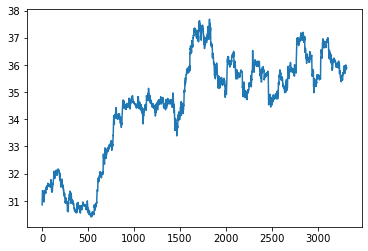

In [ ]:
# Plotar os preços de fechamento do dataframe
# O eixo x não aparece como data

cotacoes_df.close.plot();

In [ ]:
# Transformar a coluna 'time' para o índice do dataframe

cotacoes_df.index = cotacoes_df['time']
cotacoes_df.head()

time   open   high    low  close  \
time                                                                  
2022-01-03 10:00:00 2022-01-03 10:00:00  30.84  30.98  30.76  30.85   
2022-01-03 10:05:00 2022-01-03 10:05:00  30.87  30.98  30.83  30.95   
2022-01-03 10:10:00 2022-01-03 10:10:00  30.96  31.11  30.95  31.11   
2022-01-03 10:15:00 2022-01-03 10:15:00  31.09  31.29  31.09  31.27   
2022-01-03 10:20:00 2022-01-03 10:20:00  31.27  31.42  31.25  31.38   

                     tick_volume  spread  real_volume  
time                                                   
2022-01-03 10:00:00          332       1       115800  
2022-01-03 10:05:00          377       1       103100  
2022-01-03 10:10:00          382       1        88400  
2022-01-03 10:15:00          296       1       105200  
2022-01-03 10:20:00          294       1       153100

Após transformarmos o índice, se plotarmos com um zoom nos últimos 100 candles, notamos que ele preenche os valores das horas (e também dos dias) sem pregão

In [ ]:
# Observar as horas entre o fechamento de um dia e abertura de outro dia

cotacoes_df[-100:].close.plot();

O uso de bibliotecas mais potentes para vizualização gráfica.<br/>
Usando a Plotly, produziremos um gráfico de candlesticks, filtrando finais de semana, horas sem pregão para determinado ativo e feriados (filtros específicos podem ser feitos separadamente)<br/>
Note que o gráfico é interativo

In [ ]:
fig_cotacoes = go.Figure(data=[go.Candlestick(name="PETR3",x=cotacoes_df.index, open=cotacoes_df['open'], high = cotacoes_df['high'], low=cotacoes_df['low'], close=cotacoes_df['close'])])

fig_cotacoes.update_xaxes(title_text="<b> Data",
                          rangebreaks=[
    dict(bounds=["sat", "mon"]), # não mostrar finais de semana
    dict(bounds=[18, 10], pattern="hour"), # não mostrar horas de pregao fechado (observar cada ativo específico)
    dict(values=["2021-12-25","2022-01-01","2022-01-02"]) # não mostrar recesso de Ano Novo
    ])

fig_cotacoes.update_yaxes(title_text="<b> Preço Ativo (R$)")
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Grafico Candlestick Ativo',template = 'simple_white',width=500,height=500,showlegend=True)
fig_cotacoes.show()

### 2.4 Checar posição atual e ordens pendentes

In [ ]:
# Checar a moeda configurada na conta

account_currency=mt5.account_info().currency
print("Account currency:",account_currency)

Account currency: BRL


In [ ]:
# Verificar a presença de ordens pendentes no geral

orders=mt5.orders_total()
if orders>0:
    print("Total de ordens=",orders)
else:
    print("Nenhuma ordem encontrada")

Nenhuma ordem encontrada


In [ ]:
# Detalhar as ordens de um ativo específico

ativo="MGLU3"
orders=mt5.orders_get(symbol=ativo)

if orders is None:
    print("Nenhuma ordem encontrada para",ativo,"error code={}".format(mt5.last_error()))
else:
    print("Total de ordens =",len(orders))
    # exibimos todas as ordens ativas
    for order in orders:
        print(order)
print()

Total de ordens = 0



### 2.5 Configurar uma ordem de Compra a Mercado

Preparamos a estrutura de solicitação para compra a Mercado<br/>
Outros tipos de ordem (Limite e Stop) são discutidas em tópicos posteriores<br/>
Garantir que o símbolo está no MarketWatch do MT5

In [ ]:
symbol = "VALE3"
mt5.symbol_select(symbol,True)
symbol_info = mt5.symbol_info(symbol)
symbol_info

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=53932, session_buy_orders=0, session_sell_orders=0, volume=300, volumehigh=600000, volumelow=100, time=1649347232, digits=2, spread=1, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=97.42, bidhigh=97.44, bidlow=95.14, ask=97.43, askhigh=97.45, asklow=95.18, last=97.42, lasthigh=97.45, lastlow=95.14, volume_real=300.0, volumehigh_real=600000.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0, volume_max=4

**Configurar:**<br/>
Quantidade = número de ações/contrato (float, colocar  ".0" );<br/>
Pontos = tick mínimo do ativo (ex., para ações usualmente R\$ 0.01, WINFUT 5pts);<br/>
Preco = preço de compra (colocamos no ask do ativo para executar a mercado);<br/>
Desvio_toler = Desvio máximo aceitável em relação ao preço solicitado (em pontos). Também é conhecido como 'offset' de ordem

In [ ]:
qtd = 500.0
tick_min = mt5.symbol_info(symbol).point
preco = mt5.symbol_info_tick(symbol).ask
desvio_toler = 30

ordem_compra = {
    "action": mt5.TRADE_ACTION_DEAL, # tipo de ordem (a mercado)
    "symbol": symbol, # ativo
    "volume": 100.0, # quantidade de ações
    "type": mt5.ORDER_TYPE_BUY, # compra a mercado
    "price": preco, # preço de compra, aqui definido como ask do ativo (melhor preço de venda do book)
    "sl": preco - 100 * tick_min, #stop loss (preço de entrada - 100 ticks mínimos)
    "tp": preco + 30 * tick_min, #take profit (preço de entrada + 100 ticks mínimos)
    "deviation": desvio_toler, #ordem offset
    "magic": 1, # identificar a operação (opcional)
    "comment": "Primeiros trades Python", # comentario para a ordem (opcional)
    "type_time": mt5.ORDER_TIME_DAY, # 'validade' da ordem. Nesse caso, ordem será válida apenas durante o dia de negociação atual
    "type_filling": mt5.ORDER_FILLING_RETURN, # ordem pode ser executada parcialmente, e manter o residual nao executado para uma nova entrada
}

In [ ]:
mt5.order_check(ordem_compra)

OrderCheckResult(retcode=0, balance=94259.0, equity=94259.0, profit=0.0, margin=0.0, margin_free=94259.0, margin_level=0.0, comment='Done', request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=97.4, stoplimit=0.0, sl=96.4, tp=97.7, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0))

In [ ]:
# Checar a estrutura da ordem

result_compra = mt5.order_check(ordem_compra)
print("Estrutura da ordem nº",ordem_compra['magic'],'"'+ordem_compra['comment']+'"')
result_dict=result_compra._asdict()
for field in result_dict.keys():
    print("   {}={}".format(field,result_dict[field]))
    # se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
    if field=="ordem_compra":
        traderequest_dict=result_dict[field]._asdict()
        for tradereq_filed in traderequest_dict:
            print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
 

Estrutura da ordem nº 1 "Primeiros trades Python"
   retcode=0
   balance=94259.0
   equity=94259.0
   profit=0.0
   margin=0.0
   margin_free=94259.0
   margin_level=0.0
   comment=Done
   request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=97.4, stoplimit=0.0, sl=96.4, tp=97.7, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0)


### 2.6 Enviar uma ordem de compra (configurada anteriormente) ao MT5

In [ ]:
# Enviar a solicitação de negociação

result_compra = mt5.order_send(ordem_compra)

Verificar o resultado da execução

In [ ]:
print("1. Ordem_enviada para {}, {} ações a {} com tolerancia de {} pontos".format(symbol,qtd,preco,desvio_toler));

## Se ordem não pôde ser enviada, informar os detalhes
if result_compra.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. ENVIO DE ORDEM FALHOU !!!, retcode={}".format(result_compra.retcode))
   # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_dict=result._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_compra":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
    print("CANCELAR E FECHAR")

else: ## Se ordem foi executada corretamenteda informar os detalhes
    print("2. ENVIO DE ORDEM EXECUTADO COM SUCESSO !!!, ", result_compra)
    print("   POSITION_TICKET={}".format(result_compra.order))

1. Ordem_enviada para VALE3, 500.0 ações a 97.4 com tolerancia de 30 pontos
2. ENVIO DE ORDEM EXECUTADO COM SUCESSO !!!,  OrderSendResult(retcode=10009, deal=868716930, order=1144977132, volume=100.0, price=97.39, bid=97.37, ask=97.39, comment='Request executed', request_id=1, retcode_external=0, request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=97.4, stoplimit=0.0, sl=96.4, tp=97.7, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0))
   POSITION_TICKET=1144977132


Agora um exemplo de resultado quando a operação não é executada corretamente<br/>
Colocar um ativo que não existe: PETR2

In [ ]:
symbol_fake = "PETR2"
mt5.symbol_select(symbol,True)
symbol_info = mt5.symbol_info(symbol)

ordem_fake = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol_fake,
    "volume": qtd,
    "type": mt5.ORDER_TYPE_BUY,
    "price": preco,
    "sl": preco - 100 * tick_min,
    "tp": preco + 100 * tick_min,
    "deviation": 0,
    "magic": 1,
    "comment": "Primeiros trades Python",
    "type_time": mt5.ORDER_TIME_DAY,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

result_fake = mt5.order_send(ordem_fake)

print("1. Ordem_enviada(): para {}, {} ações a {} com tolerancia de {} pontos".format(symbol_fake,qtd,preco,desvio_toler));

## Se ordem não pôde ser enviada, informar os detalhes
if result_fake.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. ENVIO DE ORDEM FALHOU !!!, retcode={}".format(result_fake.retcode))
   # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_fake_dict=result_fake._asdict()
    for field in result_fake_dict.keys():
        print("   {}={}".format(field,result_fake_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_fake":
            traderequest_dict=result_fake_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
    print("CANCELAR E FECHAR")

else:
    ## Se ordem foi executada corretamenteda informar os detalhes
    print("2. ENVIO DE ORDEM EXECUTADO COM SUCESSO !!!, ", result_fake)
    print("   POSITION_TICKET={}".format(result_fake.order))

1. Ordem_enviada(): para PETR2, 500.0 ações a 97.4 com tolerancia de 30 pontos
2. ENVIO DE ORDEM FALHOU !!!, retcode=10013
   retcode=10013
   deal=0
   order=0
   volume=0.0
   price=0.0
   bid=0.0
   ask=0.0
   comment=Invalid request
   request_id=0
   retcode_external=0
   request=TradeRequest(action=1, magic=1, order=0, symbol='PETR2', volume=500.0, price=97.4, stoplimit=0.0, sl=96.4, tp=98.4, deviation=0, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0)
CANCELAR E FECHAR


### 2.7 Verificar as posições abertas

Obs: Não confundir posição com ordem aberta

In [ ]:
# Total de posições abertas

positions_total=mt5.positions_total()
if positions_total>0:
    print("Total de posições =",positions_total)
else:
    print("Nenhuma posição encontrada")

Total de posições = 1


In [ ]:
# Posição aberta para um determinado ativo

ativo_positions=mt5.positions_get(group="*ITUB4*")

if ativo_positions==None:
    print("Nenhuma posição para o ativo\"ITUB4\", error code={}".format(mt5.last_error()))
elif len(ativo_positions)>0:
    print("Posições para o ativo \"ITUB4\") = {}".format(len(ativo_positions)))
    # exibimos essas posições como uma tabela usando pandas.DataFrame
    df=pd.DataFrame(list(ativo_positions),columns=ativo_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis=1, inplace=True)
    print(df)

### 2.8 Ordem para encerrar a compra executada anteriormente

In [ ]:
# Acessar o número da ordem executada anteriormente
# Relebrando a variável ==> result = mt5.order_check(ordem_compra)

position_id=result_compra.order
position_id

1144977132

In [ ]:
# Detalhamento da ordem de compra executada

result_compra.request

TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=100.0, price=97.4, stoplimit=0.0, sl=96.4, tp=97.7, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0)

Parâmetros para a ordem de venda (fechamento da ordem de compra já executada). <br/>
Não sei bem o motivo, mas as vezes, se nao repetirmos os parâmetros aqui, não roda <br/>
Executar venda a mercado com o preço bid (melhor oferta de compra)

In [ ]:
# Parâmetros para a ordem de venda (fechamento da ordem de compra já executada)

symbol='ITUB4'
qtd= 500.0
position_id=result_compra.order
preco_sell=mt5.symbol_info_tick(symbol).bid
desvio_toler = 20

ordem_fechamento={
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": qtd,
    "type": mt5.ORDER_TYPE_SELL,
    "position": position_id,
    "price": preco_sell,
    "deviation": desvio_toler,
    "magic": 1,
    "comment": "Primeiros trades Python",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

# Executar ordem estabelecida acima

result_fechamento = mt5.order_send(ordem_fechamento)

In [ ]:
# Verificar o resultado da execução

print("3. Fechamento posição #{}: venda {} {} açoes a {} com tolerância {} pontos".format(position_id,symbol,qtd,preco_sell,desvio_toler));

if result_fechamento.retcode != mt5.TRADE_RETCODE_DONE:
    print("4. FECHAMENTO DE ORDEM FALHOU, retcode={}".format(result_fechamento.retcode))
    print("   result",result_fechamento)
else:
    print("4. POSIÇÃO ENCERRADA COM SUCESSO referente à ordem #{} closed, {}".format(position_id,result_fechamento))
   # solicitamos o resultado na forma de dicionário e exibimos elemento por elemento
    result_dict=result_fechamento._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        #se esta for uma estrutura de uma solicitação de negociação, também a exibiremos elemento a elemento
        if field=="ordem_fechamento":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))

3. Fechamento posição #1144977132: venda ITUB4 500.0 açoes a 26.7 com tolerância 20 pontos
4. FECHAMENTO DE ORDEM FALHOU, retcode=10038
   result OrderSendResult(retcode=10038, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Volume to be closed exceeds the position volume', request_id=2, retcode_external=0, request=TradeRequest(action=1, magic=1, order=0, symbol='ITUB4', volume=500.0, price=26.7, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=2, type_time=0, expiration=0, comment='Primeiros trades Python', position=1144977132, position_by=0))


In [ ]:
# Total de posições abertas

positions_total=mt5.positions_total()
if positions_total>0:
    print("Total de posições =",positions_total)
else:
    print("Nenhuma posição encontrada")

Total de posições = 1


### 2.9 Histórico de ordens e trades

Ordens

In [ ]:
# Histórico geral de ordens

from_date=datetime(2022,1,1)
to_date=datetime.now()

history_orders=mt5.history_orders_total(from_date, datetime.now())

if history_orders>0:
    print("Histórico de ordens de",from_date,"a",to_date," = ",history_orders,"ordens")
else:
    print("Nenhum histórico encontrado para esse período")

Histórico de ordens de 2022-01-01 00:00:00 a 2022-04-07 16:01:06.913504  =  111 ordens


Trades realizados

In [ ]:
# Obtemos o número de transações no histórico

from_date=datetime(2020,1,1)
to_date=datetime.now()
deals=mt5.history_deals_total(from_date, to_date)
if deals>0:
    print("Total trades =",deals)
else:
    print("Não foram encontradas transações nesse período")

Total trades = 101


In [ ]:
# Histórico de ordens para um ativo específico

from_date=datetime(2022,1,1)
to_date=datetime.now()

history_orders=mt5.history_orders_get(from_date, to_date, group="*ITUB4*")

if history_orders==None:
    print("Nenhum histórico encontrado para esse período e=\"*ITUB4*\", error code={}".format(mt5.last_error()))
elif len(history_orders)>0:
    print("history_orders_get({}, {}, group=\"*ITUB4*\")={}".format(from_date,to_date,len(history_orders)))
print()

# Exibimos essas posições como uma tabela usando pandas.DataFrame
df=pd.DataFrame(list(history_orders),columns=history_orders[0]._asdict().keys())

# Caso queira excluir alguma coluna que achar desnacessária
# df.drop(['time_expiration','type_time','state','position_by_id','reason','volume_current','price_stoplimit','sl','tp'], axis=1, inplace=True)

df['time_setup'] = pd.to_datetime(df['time_setup'], unit='s')
#df['time_setup_msc'] = pd.to_datetime(df['time_setup_msc'], unit='s')
df['time_done'] = pd.to_datetime(df['time_done'], unit='s')
print(df)

history_orders_get(2022-01-01 00:00:00, 2022-04-07 16:08:51.075119, group="*ITUB4*")=67

        ticket          time_setup  time_setup_msc           time_done  \
0   1091402740 2022-02-17 11:56:19   1645098979878 2022-02-17 11:56:19   
1   1091670751 2022-02-17 13:35:48   1645104948180 2022-02-17 13:35:48   
2   1091684341 2022-02-17 13:43:51   1645105431124 2022-02-17 13:43:51   
3   1091690684 2022-02-17 13:47:03   1645105623123 2022-02-17 13:47:03   
4   1091704582 2022-02-17 13:59:09   1645106349065 2022-02-17 13:59:09   
..         ...                 ...             ...                 ...   
62  1135107695 2022-03-30 13:52:43   1648648363039 2022-03-30 13:52:43   
63  1135130868 2022-03-30 13:58:50   1648648730385 2022-03-30 13:58:50   
64  1135130953 2022-03-30 13:58:51   1648648731158 2022-03-30 13:58:51   
65  1135425334 2022-03-30 16:08:32   1648656512641 2022-03-30 16:08:32   
66  1135433202 2022-03-30 16:13:59   1648656839614 2022-03-30 16:13:59   

    time_done_msc  tim

Exibir todas as ordens históricas de um ativo<br/>

Transações efetivadas

In [ ]:
# Histórico de trades para um ativo específico

from_date=datetime(2022,1,1)
to_date=datetime.now()

history_deals=mt5.history_deals_get(from_date, to_date, group="*ITUB4*")

if history_deals==None:
    print("Nenhum histórico de trades encontrado para esse período e=\"*ITUB4*\", error code = {}".format(mt5.last_error()))
elif len(history_orders)>0:
    print("history_deals_get({}, {}, group=\"*ITUB4*\")={}".format(from_date,to_date,len(history_deals)))
print()

# Exibimos essas posições como uma tabela usando pandas.DataFrame
df=pd.DataFrame(list(history_deals),columns=history_deals[0]._asdict().keys())

# Caso queira excluir alguma coluna que achar desnacessária
# df.drop(['time_expiration','type_time','state','position_by_id','reason','volume_current','price_stoplimit','sl','tp'], axis=1, inplace=True)

df['time'] = pd.to_datetime(df['time'], unit='s')
print(df)

history_deals_get(2022-01-01 00:00:00, 2022-04-07 16:08:56.938423, group="*ITUB4*")=67

       ticket       order                time       time_msc  type  entry  \
0   828568952  1091402740 2022-02-17 11:56:19  1645098979879     0      0   
1   828723306  1091670751 2022-02-17 13:35:48  1645104948181     0      0   
2   828729432  1091684341 2022-02-17 13:43:51  1645105431124     0      0   
3   828732543  1091690684 2022-02-17 13:47:03  1645105623123     0      0   
4   828741543  1091704582 2022-02-17 13:59:09  1645106349065     0      0   
..        ...         ...                 ...            ...   ...    ...   
62  861435784  1135107695 2022-03-30 13:52:43  1648648363039     1      1   
63  861456591  1135130868 2022-03-30 13:58:50  1648648730398     0      0   
64  861456663  1135130953 2022-03-30 13:58:51  1648648731160     1      1   
65  861678873  1135425334 2022-03-30 16:08:32  1648656512641     0      0   
66  861683930  1135433202 2022-03-30 16:13:59  1648656839614     

In [ ]:
df.to_excel("Output_trades.xlsx", sheet_name='Ativo1')

In [ ]:
## https://www.mql5.com/pt/docs/integration/python_metatrader5/mt5ordercheck_py

## 3. Trade automatizado (criando robôs no MT5 com Python)

In [ ]:
# Estabelecer a conexão ao MetaTrader 5

mt5.initialize()

# Definimos o fuso horário da B3 - Brasil

timezone = pytz.timezone("America/Sao_Paulo")

In [ ]:
# Definir data inicial e data e hora atual, neste formato
# Observe que a variável data_hora_atual possui data, hora, minutos, segundos e microsegundos

data_inicio = datetime(2022,1,1, tzinfo=timezone)
data_hora_atual = datetime.today()
data_hora_atual

datetime.datetime(2022, 4, 7, 16, 9, 2, 289534)

Extrair a cotação em tempo real de um ativo (ex., WINJ22), executando em intervalos de 5 em 5 segundos.<p>
Para não se tornar um loop infinito, vamos iniciar uma contagem do 0 e pedir que a cada extração ele adicione 1 a essa contagem.<p>
O loop deverá ser executado até que a contagem chegue a 5.<p>

In [ ]:
import sys

In [ ]:
count_cotacoes = 0

while count_cotacoes < 5:
    ativo = mt5.symbol_info_tick("WINJ22")
    print("\r" + str(ativo.last))
    sys.stdout.flush()
    count_cotacoes += 1
    time.sleep(5)

118945.0
118945.0
118945.0
118955.0


In [ ]:
# Acessar o último tick do ativo

ativo.last

In [ ]:
datetime.today()

In [ ]:
# Agora vamos gerar uma estrutura de dataframe em tempo real, extraindo a cotação e calculando um indicador (ex., MM 9 períodos) em um timeframe específico (ex., 1min)

symbol='WINJ22'
cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio,datetime.today())
cotacoes_df = pd.DataFrame(cotacoes_ativo)
cotacoes_df['time']=pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df.index = cotacoes_df['time']

## Cálculo Média Móvel de 9 períodos
MM_periodo = 9
MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
MMA_3 = cotacoes_df['close'].rolling(window=3).mean()
cotacoes_df['MMA_9p'] = MMA
cotacoes_df['MMA_3p'] = MMA_3
cotacoes_df.tail(20)

In [ ]:
# Plotar os últimos 10 candles juntamente com a média móvel de 9 períodos

cotacoes_df2 = cotacoes_df[-10:]

fig_cotacoes = go.Figure(data=[go.Candlestick(name="PETR4",x=cotacoes_df2.index, open=cotacoes_df2['open'], high = cotacoes_df2['high'], low=cotacoes_df2['low'], close=cotacoes_df2['close'])])

fig_cotacoes.add_trace(go.Scatter(name='MMA_9p', x=cotacoes_df2.index, y=cotacoes_df2.MMA_9p, marker_color='blue'))
fig_cotacoes.add_trace(go.Scatter(name='MMA_3p', x=cotacoes_df2.index, y=cotacoes_df2.MMA_3p, marker_color='red'))

fig_cotacoes.update_yaxes(title_text="<b> Preço Ativo (R$)")
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Grafico Candlestick Ativo',template = 'simple_white',width=500,height=500,showlegend=True)
fig_cotacoes.show()

Para aumentar a complexidade do código, incluindo a estrutura da ordem de compra. Dessa vez o output será o horário atual, o preço de fechamento do último candle, o valor da MM e se teriamos ou não um sinal de compra/venda <p>
Nesse caso, assim que surgir um sinal de compra/venda finalizaremos a extração dos dados

In [ ]:
contador_sinais = 0
posição = 0

while (contador_sinais < 20) and (posição == 0):
    contador_sinais += 1
    print("-----------------------------------------------------")
    print("A hora atual é",datetime.today())
    
    symbol='PETR4'
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio,datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time']=pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']

    ## Cálculo Média Móvel de 3 períodos (para agilizar a ocorrência de um sinal de entrada)
    MM_periodo = 5
    MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
    cotacoes_df['MMA'] = MMA
    
    print("O preço de fechamento anterior havia sido de",cotacoes_df.close[-2],"e a MM_3p estava em",cotacoes_df.MMA[-2])
    print("O preço de fechamento atual foi",cotacoes_df.close[-1],"e a MM_3p está em",cotacoes_df.MMA[-1])
    
    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2]):
        print("Sinal de entrada COMPRA")
        posição = 1
        time.sleep(15)
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2]):
        print("Sinal de entrada VENDA")
        posição = -1
        time.sleep(15)
    else:
        print("Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg")
        time.sleep(15)

In [ ]:
# Plotar os últimos 10 candles juntamente com a média móvel de 3 períodos

cotacoes_df2 = cotacoes_df[-10:]

fig_cotacoes = go.Figure(data=[go.Candlestick(name="PETR4",x=cotacoes_df2.index, open=cotacoes_df2['open'], high = cotacoes_df2['high'], low=cotacoes_df2['low'], close=cotacoes_df2['close'])])

fig_cotacoes.add_trace(go.Scatter(name='MMA', x=cotacoes_df2.index, y=cotacoes_df2.MMA, marker_color='blue'))

fig_cotacoes.update_yaxes(title_text="<b> Preço Ativo (R$)")
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Grafico Candlestick Ativo',template = 'simple_white',width=500,height=500,showlegend=True)
fig_cotacoes.show()

Agora executando ordens de compra ou venda direto no MT5 quando o sinal surge

In [ ]:
contador_sinais = 0
posição = 0

while (contador_sinais < 20) and (posição == 0):
    contador_sinais += 1
    print("-----------------------------------------------------")
    print("A hora atual é",datetime.today())
    
    symbol='WINJ22'
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M1, data_inicio,datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time']=pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']

    ## Cálculo Média Móvel de 3 períodos (para agilizar a ocorrência de um sinal de entrada)
    MM_periodo = 3
    MMA = cotacoes_df['close'].rolling(window=MM_periodo).mean()
    cotacoes_df['MMA'] = MMA
    
    qtd = 1.0
    tick_min = mt5.symbol_info(symbol).point
    preco_compra = mt5.symbol_info_tick(symbol).ask
    preco_venda = mt5.symbol_info_tick(symbol).bid
    desvio_toler = 0

    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL, # tipo de ordem (a mercado)
        "symbol": symbol, # ativo
        "volume": qtd, # qtd
        "type": mt5.ORDER_TYPE_BUY, # compra a mercado
        "price": preco_compra, # preço de compra, aqui definido como ask do ativo (melhor preço de venda do book)
        "sl": preco_compra - 100 * tick_min, #stop loss (preço de entrada - 100 ticks mínimos)
        "tp": preco_compra + 100 * tick_min, #take profit (preço de entrada + 100 ticks mínimos)
        "deviation": desvio_toler, #ordem offset
        "magic": 1, # identificar a operação (opcional)
        "comment": "Trades automatizados Python", # comentario para a ordem (opcional)
        "type_time": mt5.ORDER_TIME_DAY, # 'validade' da ordem. Nesse caso, ordem será válida apenas durante o dia de negociação atual
        "type_filling": mt5.ORDER_FILLING_RETURN, # ordem pode ser executada parcialmente, e manter o residual nao executado para uma nova entrada
    }
    
    ordem_venda = {
        "action": mt5.TRADE_ACTION_DEAL, # tipo de ordem (a mercado)
        "symbol": symbol, # ativo
        "volume": qtd, # qtd
        "type": mt5.ORDER_TYPE_SELL, # venda a mercado
        "price": preco_venda, # preço de compra, aqui definido como ask do ativo (melhor preço de venda do book)
        "sl": preco_venda + 100 * tick_min, #stop loss (preço de entrada - 100 ticks mínimos)
        "tp": preco_venda - 100 * tick_min, #take profit (preço de entrada + 100 ticks mínimos)
        "deviation": desvio_toler, #ordem offset
        "magic": 1, # identificar a operação (opcional)
        "comment": "Primeiros trades Python", # comentario para a ordem (opcional)
        "type_time": mt5.ORDER_TIME_DAY, # 'validade' da ordem. Nesse caso, ordem será válida apenas durante o dia de negociação atual
        "type_filling": mt5.ORDER_FILLING_RETURN, # ordem pode ser executada parcialmente, e manter o residual nao executado para uma nova entrada
    }
    
    print("O preço de fechamento anterior havia sido de",cotacoes_df.close[-2],"e a MM_3p estava em",cotacoes_df.MMA[-2])
    print("O preço de fechamento atual está em",cotacoes_df.close[-1],"e a MM_3p está em",cotacoes_df.MMA[-1])
    
    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2]):
        print("Sinal de entrada: COMPRA")
        mt5.order_send(ordem_compra)
        print("COMPRA executada com sucesso!")
        print("A ordem OCO do Stoploss está no preço:",(preco_venda - 100 * tick_min))
        print("A ordem OCO do Take Profit está no preço:",(preco_venda + 100 * tick_min))
        posição = 1
        time.sleep(15)
        
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1]) and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2]):
        print("Sinal de entrada: VENDA")
        mt5.order_send(ordem_venda)
        print("VENDA executada com sucesso!")
        print("A ordem OCO do Stoploss está no preço:",(preco_venda + 100 * tick_min))
        print("A ordem OCO do Take Profit está no preço:",((preco_venda - 100 * tick_min)))
        posição = -1
        time.sleep(15)
        
    else:
        print("Nada a fazer nesse momento. Aguarde a próxima extração em 15 seg")
        time.sleep(15)

In [ ]:
# Visualizar a ordem executada e os alvos, seja de ganho (Take Profit) ou de perda (Stop Loss)

cotacoes_df2 = cotacoes_df[-10:]

fig_cotacoes = go.Figure(data=[go.Candlestick(name="WINJ22",x=cotacoes_df2.index, open=cotacoes_df2['open'], high = cotacoes_df2['high'], low=cotacoes_df2['low'], close=cotacoes_df2['close'])])
fig_cotacoes.add_trace(go.Scatter(name='MMA', x=cotacoes_df2.index, y=cotacoes_df2.MMA, marker_color='blue'))

#fig_cotacoes.add_annotation(x=cotacoes_df2.index[-1],y=(preco_venda + 100 * tick_min), xref="x",yref="y",text="<b>Stop Loss",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
#                   arrowsize=1,arrowwidth=2,arrowcolor="black")
#fig_cotacoes.add_annotation(x=cotacoes_df2.index[-1],y=(preco_venda - 100 * tick_min), xref="x",yref="y",text="<b>Take Profit",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
#                   arrowsize=1,arrowwidth=2,arrowcolor="black")
fig_cotacoes.add_trace(go.Scatter(x=[cotacoes_df2.index[-3],cotacoes_df2.index[-1]],y=[(preco_venda - 100 * tick_min),(preco_venda - 100 * tick_min)], mode="lines+text", name="Take Profit",
                         line = dict(color='green', width=2, dash='dash')))
fig_cotacoes.add_trace(go.Scatter(x=[cotacoes_df2.index[-3],cotacoes_df2.index[-1]],y=[(preco_venda + 100 * tick_min),(preco_venda + 100 * tick_min)], mode="lines+text", name="Stop Loss",
                         line = dict(color='red', width=2, dash='dash')))

fig_cotacoes.update_yaxes(title_text="<b> Preço Ativo (R$)")
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Grafico Candlestick ordem executada',template = 'simple_white',width=500,height=500,showlegend=True)
fig_cotacoes.show()